<a href="https://colab.research.google.com/github/thiagolopes97/Portifolio_Projetos/blob/main/Reg_Cerveja_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Cerveja" width="95%" src="https://conteudo.imguol.com.br/c/entretenimento/9d/2020/02/19/alcool-cerveja-1582132883580_v2_1254x837.jpg">

#### **Breja e Machine Learning - Modelo de previsão de consumo de cerveja na cidade de São Paulo**
*by [Thiago Gonçalves Guimarães Lopessigmoidal](https://github.com/thiagolopes97/Portifolio_Projetos)*

---

Todo mundo tem alguma bebida preferida, suco, chá ou café (esse é o meu favorito!). Mas mesmo sendo o maior fá de café, jamais foi dispensar aquela **breja geladinha** no verão ou aquele *Happy Hour* com os amigos.

A pura verdade é: **cerveja é uma das bebidas mais consumidas no mundo!**. Existe uma gama enorme de tipos, fabricantes, sabores... Tem para todos os gostos e situações.

Mas agora eu lhe pergunto, qual é o país que mais consome cerveja no mundo? Estados Unidos? Brasil? Alemanha? Por incrível que pareça é a **República Tcheca**. De acordo com [Kirin Corporate Profile](https://www.kirinholdings.co.jp/english/news/2019/1224_01.html#:~:text=In%202018%2C%20the%20global%20beer,an%20annual%20increase%20of%200.8%25.), o consumo per-capita em 2018 de cerveja no país ultrapassou **190 L** no ano. Neste mesmo ranking, o Brasil aparece em 27º colocado, com um consumo de 60 L por pessoa.

Pensando nisso, proponho o seguinte estudo de caso e modelagem: Imagine que sou dono de uma cervejaria artesanal **T** e planejo vender meu produto para um bar **XYZ**, baseado nos dados de venda durante **1 ano** deste estabelecimento, como saber quantas quantas cervejas devo produzir para conter a demanda deste bar.


# Sobre este *Notebook*

Este artigo tem como propósito aplicar a metodologia de *Data Science* nesta empresa fictícia, a fim de trabalhar os conceitos e comparar modelos de ML na predição do consumo de cerveja.



> **Resumidamente, o objetivo é criar um modelo de regressão para prever consumo de cerveja.**

O projeto é então dividido em 7 etapas:

1. Data Collection
1. Data Cleaning
1. Exploratory Data Analysis (EDA)
1. Modelagem
1. Conclusão

# Data Collection

Este [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) é um conjunto de dados fornecidos no [Kaggle](https://www.kaggle.com/), uma plataforma voltada a competição de programação e conjunto de dados de todo o mundo. Um pequena detalhe, **é tudo gratuito**. Ele foi criado coletando dados na cidade de São Paulo (Brasil) e consumo de cerveja em uma área universitária, cujos frequentadores eram, em sua média, estudantes entre 18 e 28 anos.

O dados foram coletados em um período de 1 ano contendo 7 atributos, sendo eles:

Nome | Descrição
--- | ---
data | Dia que o dado foi anotado
temp_med | Temperatura média do dia em ºC
temp_min | Temperatura mínima do dia em ºC
temp_max | Temperatura máxima do dia em ºC
precipitacao | Quantos mm chuva caiu naquele dia
fimsemana | Verifica se for Sábado ou Domingo
consumo | Consumo de cerveja em litros

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics
%matplotlib inline

In [2]:
# Lendo o nosso dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Portfolio/Consumo_cerveja.csv")

# Renomeando as colunas para padronização e facilitação do código
columns = ['data','temp_med','temp_min','temp_max','precipitacao','fimsemana','consumo']
df.columns = columns

# Observando os 5 primeiros valores
display(df.head())

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


# Data cleaning

Até o momento, só importamos os dados em uma estrutura tipo *DataFrame*.  Entretanto, antes de iniciar uma análise exploratória é necessário realizar uma "limpeza" nos dados.

Mas por que fazemos isso? Primeiro pois os dados podem não estar formatados da melhor maneira (**O que é o nosso caso!**), ou pode haver valores ausentes e *outliers*. 


Para formular hipóteses, ter *insights*, iniciar uma análise exploratória dos dados adequado, é necessário levar ou não em conta essa limpeza e formatação nos dados.

In [3]:
# Vamos ver algumas informações gerais sobre os dados:

print('Informações sobre o dataset: \n')
print('Número de dados: \t {}\n'.format(df.shape[0]))
print('Número de colunas: \t {}\n'.format(df.shape[1]))
print('Valores ausentes por coluna: \n{}'.format(df.isnull().sum()))

Informações sobre o dataset: 

Número de dados: 	 941

Número de colunas: 	 7

Valores ausentes por coluna: 
data            576
temp_med        576
temp_min        576
temp_max        576
precipitacao    576
fimsemana       576
consumo         576
dtype: int64


In [4]:
# Outra forma de visualizar estes dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


Pelos números acima, 61,2% de valores do *dataset* parecem ausentes, entretanto, no nosso caso isso não é um problema, vejamos:

In [5]:
display(df.head(366))
display(df.tail(100))

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como podemos ver os valores ausentes são na verdade um erro no arquivo que gerou dados a mais. Mas o intervalo de interesse (**1 ano**) aparenta estar correto.

In [6]:
df_clean = df.copy()
df_clean.dropna(axis=0,inplace=True)
df_clean.tail()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


Agora tudo parece correto... Mas só parece, vejamos o porquê.

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


Com exceção das variáveis `fimsemana`e `consumo`, o restante está formatada como objeto e não *float*. Isso acontece pois os dados foram formatados ou inseridos desta maneira e é necessário então transformá-los em algo manipulável.

In [8]:
# Transformação dos dados para tipo float

df_clean['temp_med']     = df_clean['temp_med'].str.replace(',','.').astype(float)
df_clean['temp_min']     = df_clean['temp_min'].str.replace(',','.').astype(float)
df_clean['temp_max']     = df_clean['temp_max'].str.replace(',','.').astype(float)
df_clean['precipitacao'] = df_clean['precipitacao'].str.replace(',','.').astype(float)


# Transformação da data para o formato datetime

df_clean['data'] = pd.to_datetime(df_clean['data'], format="%Y-%m-%d")

print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          365 non-null    datetime64[ns]
 1   temp_med      365 non-null    float64       
 2   temp_min      365 non-null    float64       
 3   temp_max      365 non-null    float64       
 4   precipitacao  365 non-null    float64       
 5   fimsemana     365 non-null    float64       
 6   consumo       365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB
None


Antes de realizar a análise exploratória de dados, para ter mais ideias e possibilidades, vamos realizar um manuseio nessas datas. Vamos testar algumas hipóteses.

Por exemplo, será que as pessoas bebem mais no final de semana? Ou seria na Quinta ou Sexta? E qual o "mês que mais bebem cerveja"? Será que isso de mês existe?

Para isso, vamos extrair e adiconar algumas informações como dia da semana e mês no nosso *dataset*.

In [9]:
  '''
      No caso da função: dayofweek
      Coma como entrada a data no formato: aaaa-mm-dd e retorna
      um float que corresponde ao dia da semana, sendo por padrão:
      0 = Segunda-Feira
      1 = Terça-Feira
      2 = Quarta-Feira
      3 = Quinta-Feira
      4 = Sexta-Feira
      5 = Sábado
      6 = Domingo
      Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

      No caso da função: month
      Toma como entrada a data no formato: aaaa-mm-dd e retorna
      um float que corresponde ao mês, sendo por padrão:
      1  = Janeiro
      2  = Fevereiro
      3  = Março
      4  = Abril
      5  = Maio
      6  = Junho
      7  = Julho
      8  = Agosto
      9  = Setembro
      10 = Outubro
      11 = Novembro
      12 = Dezembro
      Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.month.html
  '''

dic_days = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta',
              4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}

dic_month = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
               5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro',
               10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

day = df_clean['data'].dt.dayofweek
month = df_clean['data'].dt.month

df_clean['dia'] = day.map(dic_days)
df_clean['mes'] = month.map(dic_month)
df_clean.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo,dia,mes
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Quinta,Janeiro
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Sexta,Janeiro
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Sábado,Janeiro
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Domingo,Janeiro
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Segunda,Janeiro


# Exploratory Data Analysis (EDA)

Vamos observar agora mais atentamente nossa variável `target`, o consumo de bebidas. No gráfico abaixo, já se pode ser que durante o ano todo, os valores são muito alterados. Por isso vamos também analisar essa variação nas 5 primeiras semanas do ano e em um intervalo aleatório de 7 dias.

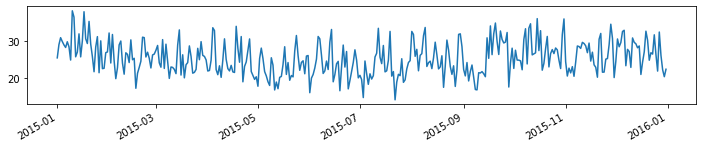

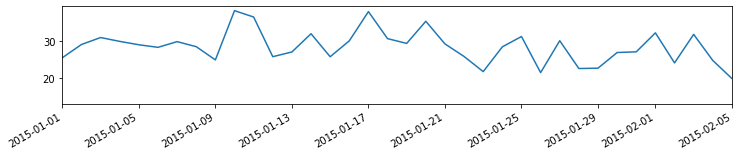

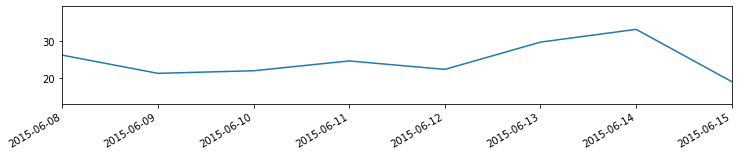

In [10]:
fig, ax = plt.subplots(figsize=(12,2))
ax.plot_date(x='data',y='consumo',data=df_clean,fmt='-');
fig.autofmt_xdate()

fig, ax = plt.subplots(figsize=(12,2))
ax.plot_date(x='data',y='consumo',data=df_clean,fmt='-')

ax.set_xlim(df_clean['data'][0], df_clean['data'][35])
fig.autofmt_xdate()

fig, ax = plt.subplots(figsize=(12,2))
ax.plot_date(x='data',y='consumo',data=df_clean,fmt='-')

rand = np.random.randint(0,350)
ax.set_xlim(df_clean['data'][rand], df_clean['data'][rand+7])
fig.autofmt_xdate()
plt.show()

Vemos que há uma variação grande no comsumo de cerveja ao analisarmos o ano todo. Porém quando observamos mais atentamente, em intervalos menores, é possível ver que mantém um padrão menos abrupto.

Mas em certos períodos ocorrem uma variação brusca, mas qual a causa ou causas que influenciam isso? Para isso, vamos analisar os dois plots abaixo. Mas **atenção**, as grandezas visualizadas **não são da mesma unidade**, esses plots nos ajuda a entender a influência da variável sobre nosso valor alvo, o **consumo**.

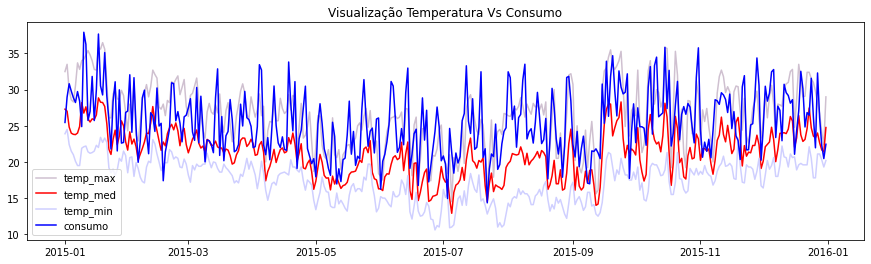

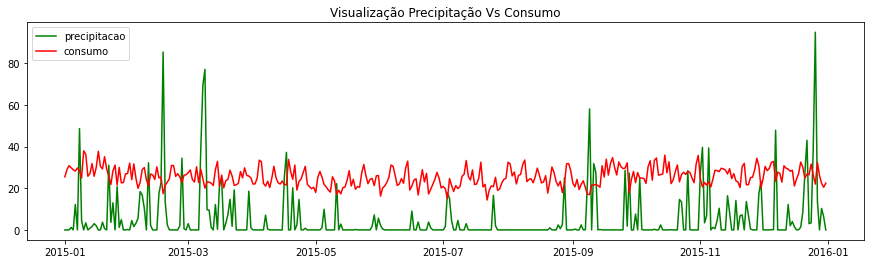

In [11]:
plt.figure(figsize=(15,4))
plt.plot_date(x='data',y='temp_max',data=df_clean,fmt='-',c='#CFC0D0');
plt.plot_date(x='data',y='temp_med',data=df_clean,fmt='-',c='r');
plt.plot_date(x='data',y='temp_min',data=df_clean,fmt='-',c='#CFCFFF');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='#0000FF');
plt.title("Visualização Temperatura Vs Consumo")
plt.legend()



plt.figure(figsize=(15,4))
plt.plot_date(x='data',y='precipitacao',data=df_clean,fmt='-',c='g');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');
plt.title("Visualização Precipitação Vs Consumo")
plt.legend()
plt.show()

A priori, sem realizar o cálculo de correlação entre o consumo e as variáveis é possível perceber duas coisas:


1.   A variação de temperatura parece ter uma forte influência. Nos dias onde a temperatura média aumentou o consumo também aumento.
2.   Em relação a precipitação, há momentos onde ela aumenta muito e não altera o consumo, há momentos onde ela aumenta pouco e influencia o consumo. Isso dá a entender que talvez a precipitação não tenha uma correlação alta com o consumo.

Agora, vejamos alguns dados estatísticos do *dataset*. Ao que tudo indica não há nenhum problema com o conjunto de dados e podemos ter um noção da ordem de grandeza das variáveis.

In [12]:
display(df_clean.describe())
display(df_clean.describe(include=['O']))

,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


,dia,mes
count,365,365
unique,7,12
top,Quinta,Outubro
freq,53,31


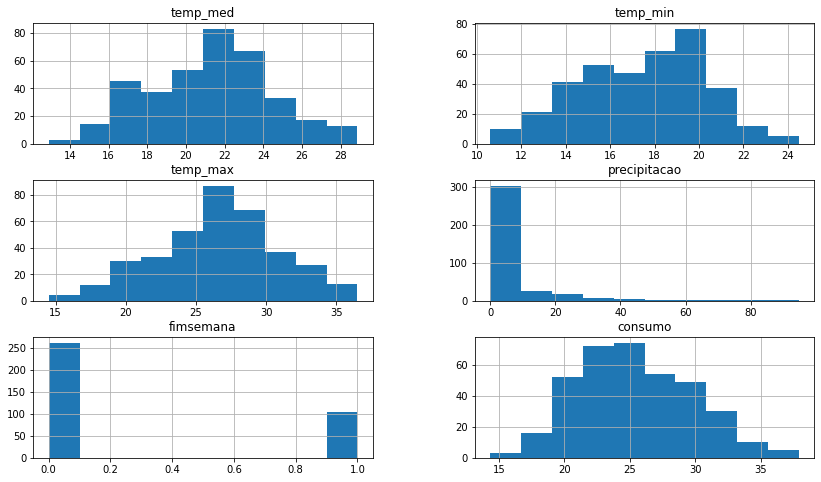

In [13]:
df_clean.hist(bins=10, figsize=(14,8))
plt.show()

Outra maneira de visualizar e extrair informações sobre o conjunto de dados é através do gráfico de dispersão. Nele podemos analisar a relação entre duas variáveis e ver se realmente aparentam ter correlação.

Na análise deste artigo, buscamos ver como o consumo de bebida é afetado pela influência climática ou temporal (dia, final de semana ou não).

Como podemos observar dos três gráficos abaixo, a única coisa que podemos concluir é que finais de semana tendem a ter um consumo maior de cerveja. Parace bem lógico certo? Mas agora constatamos isso com fatos.

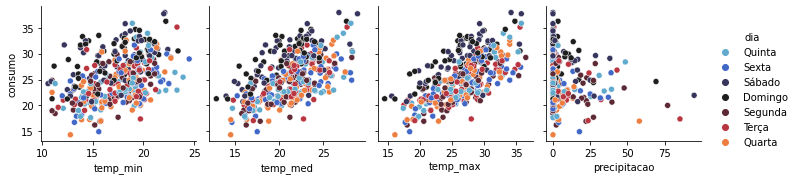

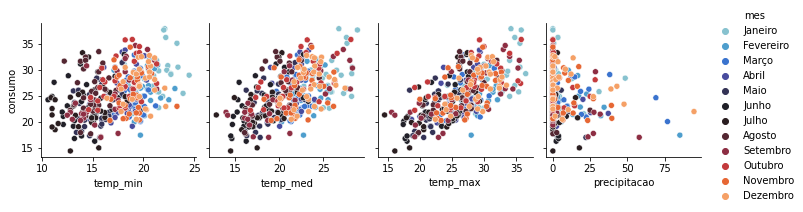

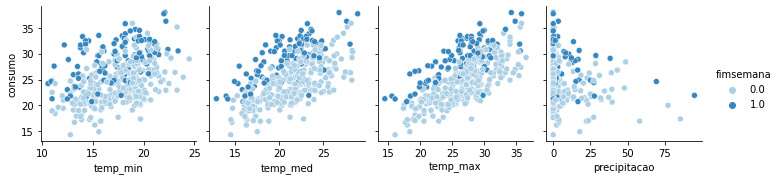

In [14]:
sns.pairplot(df_clean,x_vars= ['temp_min','temp_med','temp_max','precipitacao'],
             y_vars=['consumo'],hue='dia',diag_kind=None, palette='icefire');

sns.pairplot(df_clean,x_vars= ['temp_min','temp_med','temp_max','precipitacao'],
             y_vars=['consumo'],hue='mes',diag_kind=None, palette='icefire')

sns.pairplot(df_clean,x_vars= ['temp_min','temp_med','temp_max','precipitacao'],
             y_vars=['consumo'],hue='fimsemana',diag_kind=None, palette='Blues')

plt.show()


Outra forma ainda de verificarmos isso é analisando a média de consumo por dia e por mês. É interessante notar ainda que a média de consumo nos finais de semana é maior do que o restante dos dias.

In [15]:
# Cálculo da média por dia e visualização em ordem decrescente

display(df_clean.groupby(['dia']).mean().sort_values('consumo',ascending=False))

,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
dia,,,,,,
Domingo,20.931154,17.273077,26.117308,4.076923,1.0,29.007519
Sábado,21.010385,17.117308,26.555769,6.378846,1.0,28.837923
Terça,21.220000,17.517308,26.926923,5.805769,0.0,24.355154
Sexta,21.373077,17.586538,27.005769,4.221154,0.0,24.137885
Quinta,21.598868,17.877358,26.783019,4.552830,0.0,24.076547
Quarta,21.376538,17.644231,26.394231,2.730769,0.0,23.810385
Segunda,21.067308,17.205769,26.494231,8.623077,0.0,23.609635


In [16]:
# Cálculo da média por mês e visualização em ordem decrescente

display(df_clean.groupby(['mes']).mean().sort_values('consumo',ascending=False))

,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
mes,,,,,,
Janeiro,25.218065,21.148387,31.490323,5.038710,0.290323,28.677645
Outubro,21.905806,17.819355,27.832258,2.970968,0.290323,27.653194
Dezembro,23.519355,19.741935,28.961290,10.261290,0.258065,27.169516
Agosto,19.900000,14.887097,26.316129,1.019355,0.322581,25.908968
Novembro,22.194000,18.850000,27.040000,8.240000,0.300000,25.828200
Fevereiro,23.555000,19.935714,29.007143,9.750000,0.285714,25.673143
Setembro,21.000667,16.620000,26.673333,6.723333,0.266667,25.198133
Março,22.167097,19.012903,27.248387,10.732258,0.290323,25.036387
Abril,20.837333,17.783333,25.966667,3.603333,0.266667,24.624100


Agora que fizemos algumas inferências sobre a correlação de algumas variáveis, vamos calculá-las. Essa relação pode ser medida através do coeficiente de correlação.

Para isto, criar um *heatmap* que mostra estes valores através de um gráfico.

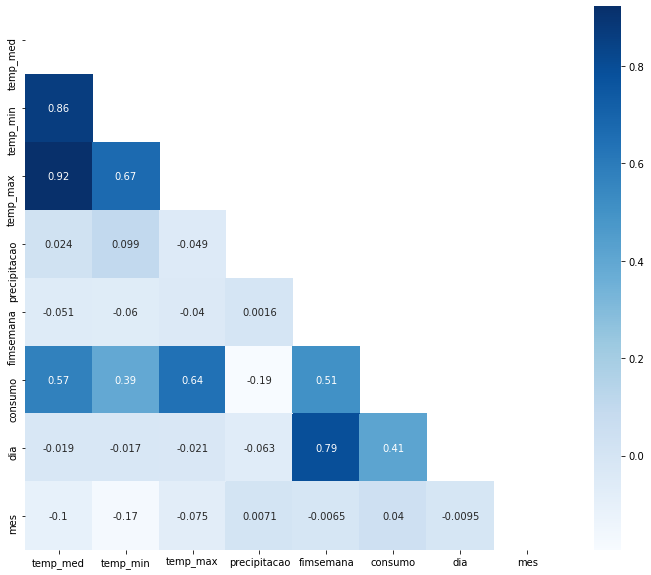

In [17]:
# Transformação das Strings em Floats

df_clean['dia'] = day
df_clean['mes'] = month
correlation = df_clean.corr()

f, ax = plt.subplots(figsize=(12, 10))

# Cria uma máscara para camuflar a parte de cima do mapa

mask = np.triu(np.ones_like(correlation,dtype=bool))

# Plot do mapa de calor

sns.heatmap(correlation,cmap='Blues',mask=mask, square=False,annot=True);

Olhando esses dados a gente observa que:

* O consumo de cerveja tem uma influência das variáveis *tem_min*, *temp_med*, *temp_max* e *fimsemana*.
* A precipitação afeta pouco, entretanto é algo que atrapalha, normalmente diminuindo o consumo de cerveja nos dias chuvosos.

Agora que realizamos as análises e comprovamos algumas ideias, bata criar os modelos de *Machine Learning* afim de aprender a interpretar esters dados. 

Como se trata de um Aprendizado Supervisionado (*Supervised Learning*), a variável alvo é o consumo. Como modelos escolhidos, foram utilizados apenas modelos Lineares de regressão.

# Modelagem

Modelos lineares são modelos que apresentam funções através de combinações lineares dos dados. Descrito matematicamente por:
$$\hat{f}(\mathbf{w},\mathbf{x})=w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

Onde $\mathbf{x}$ é a matriz de dados e $\mathbf{w}$ é o vetor de pesos. Onde cada método utiliza uma abordagem diferente para encontrar o valor de $\mathbf{w}$ que minimiza o erro do problema.

Em outras palavras, ele utiliza os valores dados para encontrar uma "reta" que descreva o comportamento daqueles pontos da melhor maneira possível. Deixo aqui alguns links com ótimas referências e documentação sobre o assunto.

<img alt="Cerveja" width="55%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/LinearRegression.svg/1200px-LinearRegression.svg.png">

A qualidade do modelo é mediada por uma função de custo, que avalia o quão bem uma estimativa se aproxima do esperado com aqueles parâmetros escolhidos. Esta função é usada para aprimorar o modelo, que tende a minimizá-la. 

Por mais que cada algoritmo possa possuir uma função de custo diferente, em problemas de regressão geralmente ela está associada ao erro quadrático médio, representado por:

$$ MSE\left ( \hat{f} \right ) = \frac{1}{n} \sum_{i=1}^{n}\left ( y_i - \hat{f}(\mathbf{x}_i) \right )^2$$

no qual $n$ é o número de entradas do conjunto avaliado, $y_i$ é o valor real e $\hat{f}(\mathbf{x}_i)$ o predito pelo modelo.

Outra medida de desempenho empregada nesta monografia é o coeficiente de determinação $R^2$, que representa a proporção de variância explicada pelas variáveis. Assim, o $R^2$ explica o quão bem as amostras nunca vistas pelos modelos serão previstas por ele. A expressão abaixo representa como o $R^2$ é calculado normalmente:
$$R^{2}\left ( y, \hat{f} \right ) = 1 - \frac{\sum_{i=1}^{n}\left ( y_i - \hat{f}\left ( \mathbf{x}_i \right ) \right )^2}{\sum_{i=1}^{n}\left ( y_i - \overline{y} \right )^2}$$

no qual $\overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$.

Foi utilizado a biblioteca Scikit-Learn para aplicar os modelos e avaliar qual se adapta melhor ao nosso problema. Vale ressaltar que **cada modelo apresenta uma fórmula ou função de custo** que pode variar da forma explicada anteriormente. Dito isso, vale a pena a leitura no link abaixo.

Neste **notebook* foram analisados os seguintes modelos:
* LinearRegression
* Ridge
* Lasso
* LassoCV
* ElasticNet
* ElasticNetCV
* HuberRegressor
* LassoLars
* BayesianRidge


**Referências**
* [TG - Murilo](https://github.com/muriloafonso/TG_ENG_FISICA/blob/master/TG_EF_MURILO.pdf_clean)
* [Scikit-Learn](https://scikit-learn.org/stable/modules/linear_model.html#)

Como qualquer conjunto de dados do mundo real, irão existir valores faltantes, dados que não servem para nada e outros que não tem peso ou significância nenhuma no seu modelo.

Como cientista de dados, escolher quais features serão usadas é um passo primordial para o sucesso do modelo. No nosso caso, vamos fazer dois testes, um somente com os dados fornecidos e outra com incluindo mês e dia da semana, para vermos se conseguimos alguma melhora.

## Modelo 1 - Conjunto Simples

In [18]:
# Separando o conjunto de dados em variáveis e target

X = df_clean[['temp_med','temp_min',	'temp_max',	'precipitacao',	'fimsemana']]
y = df_clean['consumo']

# Criação da amostra para treino e testes

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=75)

In [19]:
models = {
    'LinearReg': LinearRegression(),
    'RidgeReg': Ridge(),
    'LassoReg': Lasso(),
    'ElasticNetReg': ElasticNet(),
    'HuberReg': HuberRegressor(max_iter=10**10),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'LassoLars': LassoLars(max_iter=10**10),
    'BayesianRidge': BayesianRidge()    
}

for model in models.values():
    model.fit(X_train, y_train);

In [20]:
eval = []
nome = []
r2 = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    df_clean[name] = model.predict(X)
    nome.append(name)
    eval.append(MSE(y_test,y_pred))
    r2.append(model.score(X_test, y_test))
    print('-------------------------')
    print(name + ":\n R² : {:.4f}\n MSE: {:.4F}".format(model.score(X_test, y_test),MSE(y_test,y_pred)))
    print('-------------------------')

-------------------------
LinearReg:
 R² : 0.7035
 MSE: 4.9557
-------------------------
-------------------------
RidgeReg:
 R² : 0.7035
 MSE: 4.9565
-------------------------
-------------------------
LassoReg:
 R² : 0.4168
 MSE: 9.7484
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.4754
 MSE: 8.7687
-------------------------
-------------------------
HuberReg:
 R² : 0.7034
 MSE: 4.9575
-------------------------
-------------------------
LassoCV:
 R² : 0.7029
 MSE: 4.9669
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.7024
 MSE: 4.9751
-------------------------
-------------------------
LassoLars:
 R² : -0.0485
 MSE: 17.5256
-------------------------
-------------------------
BayesianRidge:
 R² : 0.7035
 MSE: 4.9566
-------------------------


Para ter uma melhor visualização do comportamento de cada modelo, vamos plotar os resultados destes em um intervalo de 7 dias aleatoriamente.

Abaixo do gráfico vemos as métricas de cada modelo, isto é o R² e MSE.

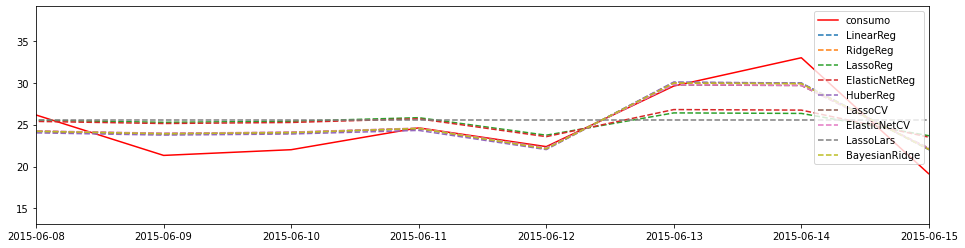

In [21]:
plt.figure(figsize=(16,4))
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');

for i in range(9,18):
  plt.plot_date(x='data',y=df_clean.columns[i],data=df_clean,fmt='--');


plt.xlim([df_clean.data[rand], df_clean.data[rand+7]])
plt.legend()
plt.show()

Melhor modelo - LinearReg:
R² :0.703522680268547
MSE:4.955697851338494


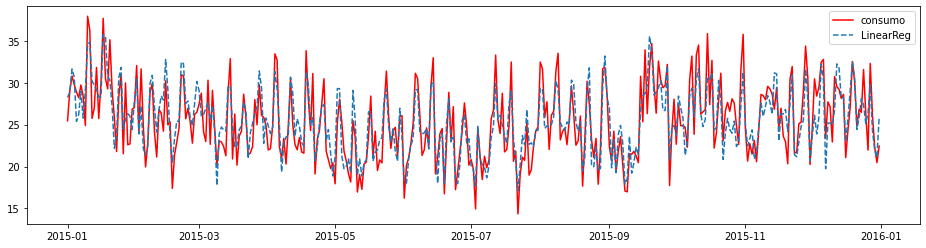

In [22]:
array = np.array(eval)
print('Melhor modelo - ' + nome[array.argmin()] + ':')
print('R² :' + r2[array.argmin()].astype(str))
print('MSE:' + array[array.argmin()].astype(str))

array = np.array(eval)
plt.figure(figsize=(16,4))
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');
plt.plot_date(x='data',y=nome[array.argmin()],data=df_clean,fmt='--');


plt.legend()
plt.show()

## Modelo 2 - Conjunto Aprimorado

In [23]:
# Separando o conjunto de dados em variáveis e target

X = df_clean[['temp_med','temp_min',	'temp_max',	'precipitacao',	'fimsemana', 'dia', 'mes']]
y = df_clean['consumo']

# Criação da amostra para treino e testes

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=75)

In [24]:
models = {
    'LinearReg': LinearRegression(),
    'RidgeReg': Ridge(),
    'LassoReg': Lasso(),
    'ElasticNetReg': ElasticNet(),
    'HuberReg': HuberRegressor(max_iter=10**10),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'LassoLars': LassoLars(max_iter=10**10),
    'BayesianRidge': BayesianRidge()    
}

for model in models.values():
    model.fit(X_train, y_train);

In [25]:
eval = []
nome = []
r2 = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    df_clean[name] = model.predict(X)
    nome.append(name)
    eval.append(MSE(y_test,y_pred))
    r2.append(model.score(X_test, y_test))
    print('-------------------------')
    print(name + ":\n R² : {:.4f}\n MSE: {:.4F}".format(model.score(X_test, y_test),MSE(y_test,y_pred)))
    print('-------------------------')

-------------------------
LinearReg:
 R² : 0.7193
 MSE: 4.6925
-------------------------
-------------------------
RidgeReg:
 R² : 0.7215
 MSE: 4.6554
-------------------------
-------------------------
LassoReg:
 R² : 0.5840
 MSE: 6.9529
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.6043
 MSE: 6.6142
-------------------------
-------------------------
HuberReg:
 R² : 0.7246
 MSE: 4.6033
-------------------------
-------------------------
LassoCV:
 R² : 0.7226
 MSE: 4.6376
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.7241
 MSE: 4.6116
-------------------------
-------------------------
LassoLars:
 R² : -0.0485
 MSE: 17.5256
-------------------------
-------------------------
BayesianRidge:
 R² : 0.7221
 MSE: 4.6446
-------------------------


Para ter uma melhor visualização do comportamento de cada modelo, vamos plotar os resultados destes em um intervalo de 7 dias aleatoriamente.

Abaixo do gráfico vemos as métricas de cada modelo, isto é o R² e MSE.

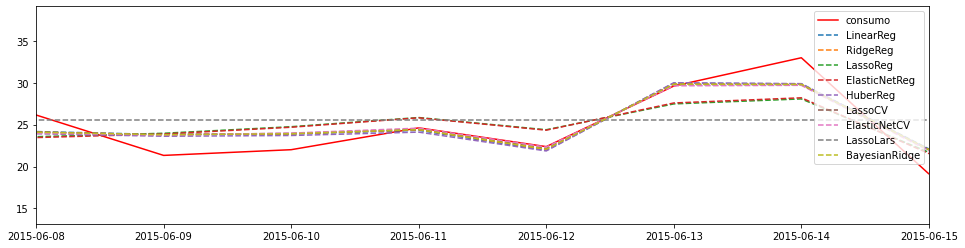

In [26]:
plt.figure(figsize=(16,4))
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');

for i in range(9,18):
  plt.plot_date(x='data',y=df_clean.columns[i],data=df_clean,fmt='--');


plt.xlim([df_clean.data[rand], df_clean.data[rand+7]])
plt.legend()
plt.show()

Melhor modelo - HuberReg:
R² :0.7246021585619914
MSE:4.603348722640283


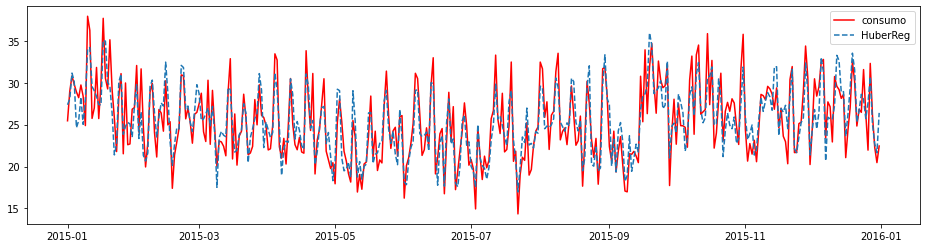

In [27]:
array = np.array(eval)
print('Melhor modelo - ' + nome[array.argmin()] + ':')
print('R² :' + r2[array.argmin()].astype(str))
print('MSE:' + array[array.argmin()].astype(str))

array = np.array(eval)
plt.figure(figsize=(16,4))
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');
plt.plot_date(x='data',y=nome[array.argmin()],data=df_clean,fmt='--');


plt.legend()
plt.show()

Analisando o melhor modelo de cada teste, vimos que utilizando o conjunto aprimorado (**aquele que adicionamos informação**) os modelos tiveram uma melhora. 

# Conclusão

Apesar ter um $R^2$ de 0,72 e erro quadrático médio de 4,6. Nosso modelo conseguiu prever e prever a curva de consumo ao longo do tempo até que bem. Com ele até poderíamos fazer um controle de estoque visando controlar a quantidade de compras da semana por exemplo.

**O importante é que breja gelada não pode faltar!**

Espero que tenha aproveitado este artigo e consiga replicar no seu computador. Até o próximo projeto. Qualquer dúvida ou sugestão é bem vinda.

Meus contatos:
*   Email: thiagogglopes97@gmail.com
*   [Linkdin](https://www.linkedin.com/in/thiago-lopes-666547164/)
*   [Medium](https://medium.com/@thiagogglopes97)



<img alt="Cerveja" width="85%" src="https://i.giphy.com/media/E4LWtyQ9KiToA/giphy.webp">